# TimeSeries

Demonstrate using the TimeSeries service.

In [1]:
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns

import synoptic

## Single Station, multi-variable

🚚💨 Speedy delivery from Synoptic timeseries service.
📦 Received data from 1 stations.


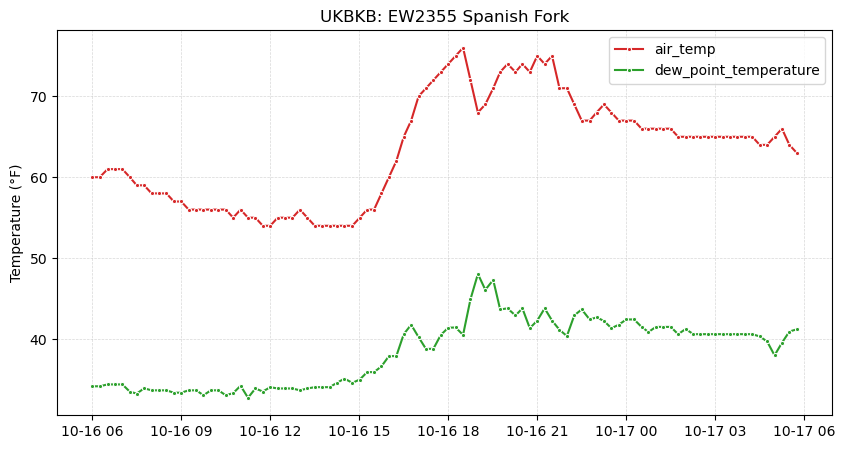

In [2]:
df = synoptic.TimeSeries(
    stid="ukbkb",
    recent=timedelta(hours=24),
    vars="air_temp,dew_point_temperature",
    units="english",
).df()

plt.figure(figsize=(10, 5))
ax = sns.lineplot(
    df,
    x="date_time",
    y="value",
    hue="variable",
    marker=".",
    palette=["tab:red", "tab:green"],
)
ax.set_title(f"{df['stid'][0]}: {df['name'][0]}")
ax.set_ylabel("Temperature (°F)")
ax.set_xlabel("")
ax.grid(alpha=0.5, zorder=0, lw=0.5, ls="--")
ax.legend(title="")

## Single variable, multi-station

🚚💨 Speedy delivery from Synoptic timeseries service.
📦 Received data from 3 stations.


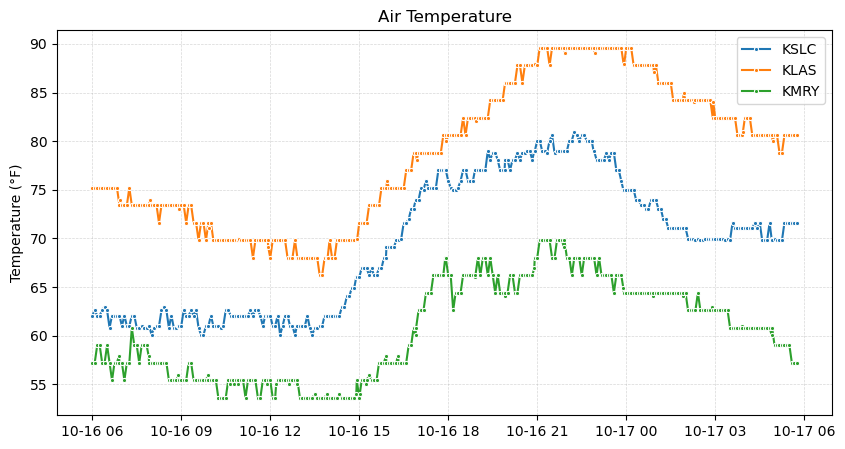

In [3]:
df = synoptic.TimeSeries(
    stid="kslc,kmry,klas",
    recent=timedelta(hours=24),
    vars="air_temp",
    units="english",
).df()

plt.figure(figsize=(10, 5))
ax = sns.lineplot(
    df,
    x="date_time",
    y="value",
    hue="stid",
    marker=".",
)
ax.set_title("Air Temperature")
ax.set_ylabel("Temperature (°F)")
ax.set_xlabel("")
ax.grid(alpha=0.5, zorder=0, lw=0.5, ls="--")
ax.legend(title="")